# Exercício 02 - 07/12/17
 
 O objetivo é Gerar um mapa com a classificação dos municípios do Estado de Tocantins em relação ao número de focos ocorridos no mês de setembro de 2016, considerando os focos do satelite de referencia.
 
 __Autor:__ Wesley Augusto Campanharo - 139203
 
 ### Considerações:
 1. Foi baixado os arquivos de focos do ano de 2006, utilizando o Satelite de Referência AQUA_M-T, do site do monitoramento de queimadas do INPE.
 2. O shape de municípios brasileiros foi baixado do site do IBGE,BCIM - Município - 1:1 000 000 - 2016.

## 1- Municípios com maiores focos de queimadas em setembro de 2016

In [11]:
# Importando as bibliotecas necessárias
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# Abrindo o arquivo de focos
focos = gpd.read_file("./dados/Focos.2016-01-01.2016-12-31.shp")

In [6]:
#Obtendo o cabeçalho da tabela de focos
focos.head(5)

,AreaIndu,Bioma,DataHora,DiaSemCh,Estado,FRP,Latitude,Longitud,Municipi,Pais,Precipit,RiscoFog,Satelite,geometry
0,,Cerrado,2016/01/01 16:28:16,0,Piaui,0.0,-10.209,-44.694,Parnagua,Brasil,6.5,1.0,AQUA_M-T,POINT (-44.694 -10.209)
1,,Cerrado,2016/01/01 16:28:16,0,Minas Gerais,0.0,-19.576,-43.593,Nova Uniao,Brasil,44.6,0.3,AQUA_M-T,POINT (-43.593 -19.576)
2,,Amazonia,2016/01/01 16:28:16,0,Mato Grosso,0.0,-12.109,-51.882,Bom Jesus do Araguaia,Brasil,66.0,0.1,AQUA_M-T,POINT (-51.882 -12.109)
3,,Cerrado,2016/01/01 16:28:16,1,Minas Gerais,0.0,-17.353,-42.482,Minas Novas,Brasil,24.0,0.3,AQUA_M-T,POINT (-42.482 -17.353)
4,,Cerrado,2016/01/01 16:28:16,0,Sao Paulo,0.0,-22.432,-46.828,Itapira,Brasil,87.7,0.0,AQUA_M-T,POINT (-46.828 -22.432)


In [7]:
#Obtendo os tipos de cada coluna
focos.dtypes

AreaIndu     object
Bioma        object
DataHora     object
DiaSemCh      int64
Estado       object
FRP         float64
Latitude    float64
Longitud    float64
Municipi     object
Pais         object
Precipit    float64
RiscoFog    float64
Satelite     object
geometry     object
dtype: object

In [8]:
#Convertendo a coluna de tempo para Time, para realizar o filtro para setembro
focos["DataHora"] = pd.to_datetime(focos["DataHora"])
focos.dtypes

AreaIndu            object
Bioma               object
DataHora    datetime64[ns]
DiaSemCh             int64
Estado              object
FRP                float64
Latitude           float64
Longitud           float64
Municipi            object
Pais                object
Precipit           float64
RiscoFog           float64
Satelite            object
geometry            object
dtype: object

In [9]:
#Realizando Filtro para o Estado de Tocantis
focos_to = focos[focos.Estado == 'Tocantins']
focos_to.head(4)

,AreaIndu,Bioma,DataHora,DiaSemCh,Estado,FRP,Latitude,Longitud,Municipi,Pais,Precipit,RiscoFog,Satelite,geometry
21,,Cerrado,2016-01-01 16:28:16,0,Tocantins,0.0,-12.380,-46.723,Taguatinga,Brasil,65.6,0.0,AQUA_M-T,POINT (-46.723 -12.38)
22,,Cerrado,2016-01-01 16:28:16,2,Tocantins,0.0,-11.395,-49.656,Duere,Brasil,16.3,1.0,AQUA_M-T,POINT (-49.656 -11.395)
95,,Cerrado,2016-01-01 16:30:00,0,Tocantins,0.0,-10.923,-49.968,Lagoa da Confusao,Brasil,15.5,1.0,AQUA_M-T,POINT (-49.968 -10.923)
152,,Cerrado,2016-01-02 17:07:35,1,Tocantins,0.0,-10.772,-50.322,Lagoa da Confusao,Brasil,55.0,1.0,AQUA_M-T,POINT (-50.322 -10.772)


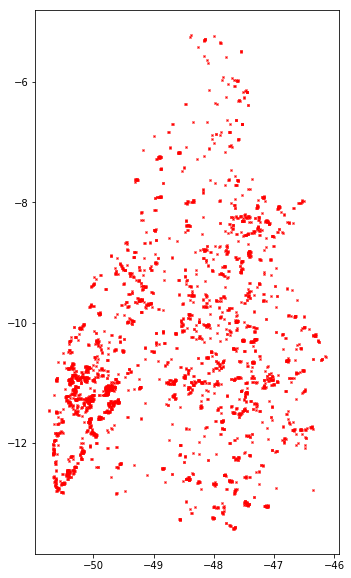

In [13]:
#Realizando Filtro para o mês de setembro
focos_to_set = focos_to[focos_to.DataHora.dt.month == 9 ]

#Plotando os focos de Tocantins e do mes de Setembro
focos_to_set.plot(marker='x',color='red',figsize=(20, 10))


In [14]:
#Ranking dos municípios com maiores focos
focos_muni_set = focos_to_set.groupby("Municipi").Municipi.count().sort_values(ascending=False)
focos_muni_set.head(5) #apresenta os 5 primeiros

Municipi
Lagoa da Confusao      523
Formoso do Araguaia    372
Parana                 144
Duere                  125
Pium                   123
Name: Municipi, dtype: int64

[<matplotlib.text.Text at 0x428e79b0>, <matplotlib.text.Text at 0x428c6400>]

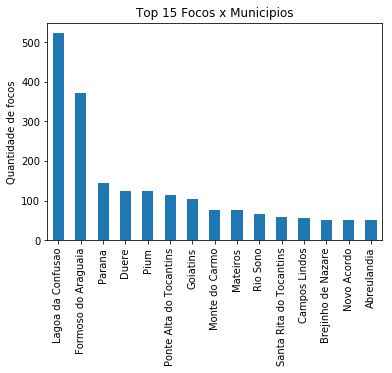

In [15]:
#Grafico dos 15 primeiros municípios com maiores registros de focos
top15 = focos_muni_set[0:15]
ax = top15.plot(kind='bar',title='Top 15 Focos x Municipios')
ax.set(xlabel="", ylabel="Quantidade de focos")

## 2 - Mapa cloropletico dos municipios do Tocantins para setembro de 2016


In [17]:
#Abrindo o arquivo de municípios brasileiros
municipio_br = gpd.read_file("./dados/BCIM_Municipio_A.shp")
municipio_br.head(5)

,anoderefer,geocodigo,geometriaa,geometry,id_objeto,nome,nomeabrev
0,2015,4113809,Sim,POLYGON ((-51.63021260539118 -22.6637230684255...,51469,Lupionópolis,Lupionópolis
1,2015,3500501,Sim,POLYGON ((-46.61019405836187 -22.4393550132671...,51531,Águas de Lindóia,Águas de Lindóia
2,2015,1508159,Sim,POLYGON ((-53.85953674607805 -2.88749976863407...,55082,Uruará,Uruará
3,2015,4318705,Sim,POLYGON ((-51.17861386909695 -29.6930926248821...,50250,São Leopoldo,São Leopoldo
4,2015,3556354,Sim,POLYGON ((-46.39677733681128 -22.8106889888657...,52124,Vargem,Vargem


In [18]:
#Obtendo o tipo de cada atributo do arquivo de Municipios
municipio_br.dtypes


anoderefer     int64
geocodigo     object
geometriaa    object
geometry      object
id_objeto      int64
nome          object
nomeabrev     object
dtype: object

In [21]:
#Para Filtrando os municípios de Tocantins, primeiro irá se descobrir o valor do geocódigo
municipio_br[municipio_br.nome == 'Palmas']



,anoderefer,geocodigo,geometriaa,geometry,id_objeto,nome,nomeabrev
652,2015,4117602,Sim,POLYGON ((-51.68796099359578 -26.2492568495251...,50068,Palmas,Palmas
4123,2015,1721000,Sim,POLYGON ((-48.33608404116648 -9.93363850899534...,53628,Palmas,Palmas


In [29]:
municipio_br[municipio_br.nome == 'Formoso do Araguaia']
#logo o geocódigo para o Tocantins é 17.....

,anoderefer,geocodigo,geometriaa,geometry,id_objeto,nome,nomeabrev
1461,2015,1708205,Sim,POLYGON ((-49.62555385759073 -11.3738357936609...,55166,Formoso do Araguaia,Formoso do Araguaia


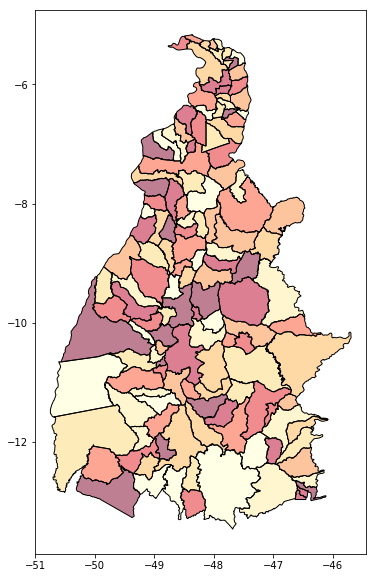

In [33]:
# Realizando os Filtros para os municípios de Tocantins
muni_to = municipio_br[municipio_br['geocodigo'].str[0:2] == '17']
muni_to.plot(cmap='YlOrRd',figsize=(20, 10))

Como as colunas de nomes dos municípios são diferentes nos dois arquivos, e como no shape focos não existe uma coluna com o geocódigo, será necessário realizar um Spatial Join entre o shape dos municípios com os de focos.

Porém os dois shapes devem estar no mesmo sistema de coordenadas

In [38]:
#Descobrindo se os dois arquivos possuem o mesmo CRS
print("Municipio: {0}").format(muni_to.crs)
print("Focos: {0}").format(focos_to_set.crs)

Municipio: {'init': u'epsg:4674'}
Focos: {'init': u'epsg:4326'}


In [39]:
# Convertendo o sistema de coordenadas dos municipios para o mesmo do focos
muni_to.crs = focos_to_set.crs

In [40]:
#Confirmando a conversão de sistema de coordenada
print("Municipio: {0}").format(muni_to.crs)
print("Focos: {0}").format(focos_to_set.crs)

Municipio: {'init': u'epsg:4326'}
Focos: {'init': u'epsg:4326'}


In [41]:
#Realizando o Spatial Join
muni_focos_to = gpd.sjoin(focos_to_set, muni_to, how="right", op='intersects')

muni_focos_to.head(3)

,AreaIndu,Bioma,DataHora,DiaSemCh,Estado,FRP,Latitude,Longitud,Municipi,Pais,...,RiscoFog,Satelite,index_left,anoderefer,geocodigo,geometriaa,geometry,id_objeto,nome,nomeabrev
index_right,,,,,,,,,,,,,,,,,,,,,
4183,,Cerrado,2016-09-01 16:04:38,40.0,Tocantins,0.0,-8.048,-47.666,Goiatins,Brasil,...,1.0,AQUA_M-T,84977,2015,1709005,Sim,POLYGON ((-47.43144442709032 -7.54999923442765...,55526,Goiatins,Goiatins
4183,,Cerrado,2016-09-01 16:04:38,40.0,Tocantins,0.0,-8.047,-47.670,Goiatins,Brasil,...,1.0,AQUA_M-T,84996,2015,1709005,Sim,POLYGON ((-47.43144442709032 -7.54999923442765...,55526,Goiatins,Goiatins
4183,,Cerrado,2016-09-01 16:04:38,20.0,Tocantins,0.0,-8.252,-47.428,Goiatins,Brasil,...,1.0,AQUA_M-T,85013,2015,1709005,Sim,POLYGON ((-47.43144442709032 -7.54999923442765...,55526,Goiatins,Goiatins


Ao se realizar o Spatial Join, replicamos o geometia dos municípios para a mesma quantidade de focos de queimada para ele existente, assim, devemos realizar uma agregação dos resultados

In [64]:
# Escolheu-se o dissolve, pois realiza a aggregação da geometria tambem
muni_focos_final= muni_focos_to.dissolve(by='Municipi', aggfunc='count')
muni_focos_final.head(2)

,geometry,AreaIndu,Bioma,DataHora,DiaSemCh,Estado,FRP,Latitude,Longitud,Pais,Precipit,RiscoFog,Satelite,index_left,anoderefer,geocodigo,geometriaa,id_objeto,nome,nomeabrev
Municipi,,,,,,,,,,,,,,,,,,,,
Abreulandia,POLYGON ((-49.70008297380701 -9.16523568642608...,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
Alianca do Tocantins,POLYGON ((-48.57281347987404 -11.3896268418598...,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


In [75]:
#Como ele agrupa todas as colunas, será necessário reformular o dataframe final, para ficar mais organizado
a = muni_focos_final[['Bioma','geometry']]
gdf = a.rename(columns={'Bioma': 'Qtd_Focos'}).set_geometry('geometry')
gdf.index.name = "Municipios"
gdf.head(4)

,Qtd_Focos,geometry
Municipios,,
Abreulandia,50,POLYGON ((-49.70008297380701 -9.16523568642608...
Alianca do Tocantins,19,POLYGON ((-48.57281347987404 -11.3896268418598...
Almas,42,POLYGON ((-47.26391001686534 -10.9739458570156...
Alvorada,1,POLYGON ((-49.05049552246343 -12.1925595341325...


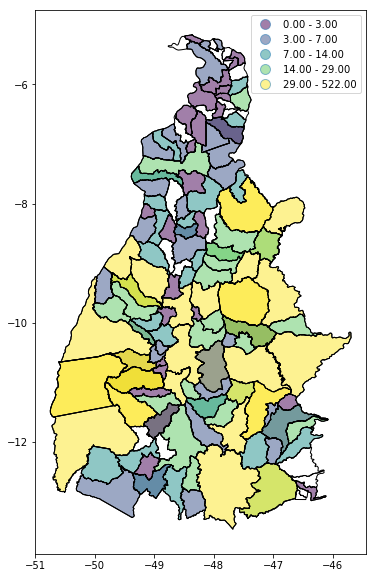

In [113]:
base = muni_to.plot(color='white', figsize=(20,10),legend=True)
gdf.plot(ax=base, column='Qtd_Focos', legend=True,k=5, scheme='quantiles', figsize=(20,10),edgecolor='black')


### Links Utilizados:
- http://geopandas.org/projections.html
- https://pandas.pydata.org/pandas-docs/stable/merging.html
- http://geopandas.org/aggregation_with_dissolve.html
- http://geopandas.org/data_structures.html
- http://matplotlib.org/users/colormaps.html